**Report Title: Analyzing Global Protein Intake Trends: Correlations Between Economic and Health Indicators**
---



#1. Executive Summary

# 2. Introduction



*   Background:
    - Importance of global nutrition trends and their impact on public health.
    - Role of economic indicators (GDP per capita, food prices) and health indices (HDI) in influencing protein intake.

*  Objectives:
    - Analyze global trends in protein intake.
    - Study correlations between protein supply and total food supply.
    - Conduct regional comparisons and study the relationship between protein intake and socioeconomic indicators.
    - Identify key periods of change and drivers of protein supply trends.

*  Scope:
    - Focus on global data across multiple regions and years.
    - Integration of food supply data, protein intake, and economic and health
    indicators.

---



#3. Data

*  Data Sources:
  - FAO dataset: Protein supply quantity (g/capita/day), total food supply
  - Socioeconomic indicators: GDP, HDI (from World Bank, UNDP)
  - Regional and country-level breakdowns over multiple years

*   Data Preparation:
  - Filtering relevant indicators: Protein supply and total food supply
  - Merging datasets by country and year
  - Cleaning and handling missing or estimated values

* Exploratory Data Analysis (EDA):
  - Trend analysis: Global and regional protein supply
  - Correlation analysis: Relationship between protein intake, total food supply, GDP, and HDI

* Predictive Modeling:
  - Linear regression and Random Forest models to predict protein intake trends.
  - Feature importance analysis to identify key drivers.

---



Data Preparation:
1. Creating DataSet for the countries for the protein intake:

In [ ]:
df1 = pd.read_csv('macro2022.csv')
df1.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2010,2010,million USD,15144.569659,X,Figure from international organizations,NaN
1,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2010,2010,USD,537.238236,X,Figure from international organizations,NaN
2,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2011,2011,million USD,17923.100250,X,Figure from international organizations,NaN
3,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2011,2011,USD,612.773225,X,Figure from international organizations,NaN
4,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2012,2012,million USD,19794.405855,X,Figure from international organizations,NaN


In [ ]:
df2 = pd.read_csv('population2022.csv')
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2010,2010,1000 No,14240.377,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,2010,2010,1000 No,13949.295,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2011,2011,1000 No,14780.282,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,2011,2011,1000 No,14468.875,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2012,2012,1000 No,15399.105,X,Figure from international organizations,NaN


In [ ]:
df3 = pd.read_csv('protein2022.csv')
df3.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2901,Grand Total,2010,2010,g/cap/d,65.76,E,Estimated value,NaN
1,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2901,Grand Total,2011,2011,g/cap/d,63.96,E,Estimated value,NaN
2,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2901,Grand Total,2012,2012,g/cap/d,62.86,E,Estimated value,NaN
3,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2901,Grand Total,2013,2013,g/cap/d,63.40,E,Estimated value,NaN
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2901,Grand Total,2014,2014,g/cap/d,65.71,E,Estimated value,NaN


In [ ]:
dataframes = [df1, df2, df3]

pivoted_dfs = [df.pivot(index=["Year", "Area"], columns="Element", values="Value") for df in dataframes]

merged_df = pd.concat(pivoted_dfs, axis=1).reset_index()

merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

print(merged_df)

Element  Year                          Area      Value US$  \
0        2010                   Afghanistan   15144.569659   
1        2010                       Albania   11926.948284   
2        2010                       Algeria  161207.306305   
3        2010                       Andorra    3446.565601   
4        2010                        Angola   83799.478930   
...       ...                           ...            ...   
3052     2022    Saint-Martin (French part)            NaN   
3053     2022                       Tokelau            NaN   
3054     2022  United States Virgin Islands            NaN   
3055     2022     Wallis and Futuna Islands            NaN   
3056     2022                Western Sahara            NaN   

Element  Value US$ per capita  Total Population - Female  \
0                  537.238236                  13949.295   
1                 4093.825900                   1454.297   
2                 4495.921455                  17573.708   
3              

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    3057 non-null   int64  
 1   Area                                    3057 non-null   object 
 2   Value US$                               2746 non-null   float64
 3   Value US$ per capita                    2746 non-null   float64
 4   Total Population - Female               3049 non-null   float64
 5   Total Population - Male                 3049 non-null   float64
 6   Protein supply quantity (g/capita/day)  2383 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 167.3+ KB


In [ ]:
df_countries = merged_df.rename(columns={
    "Area": "Country",
    "Value US$": "Total GDP US$",
    "Value US$ per capita": "GDP per capita US$"
})

In [ ]:
columns_to_fill = ['Total GDP US$', 'GDP per capita US$', 'Total Population - Female', 'Total Population - Male', 'Protein supply quantity (g/capita/day)']

for col in columns_to_fill:
    df_countries[col] = df_countries.groupby('Country')[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
df_countries.set_index(['Country', 'Year'], inplace=True)
df_countries.interpolate(method='linear', inplace=True)
df_countries.reset_index(inplace=True)

In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 3057 non-null   object 
 1   Year                                    3057 non-null   int64  
 2   Total GDP US$                           3057 non-null   float64
 3   GDP per capita US$                      3057 non-null   float64
 4   Total Population - Female               3057 non-null   float64
 5   Total Population - Male                 3057 non-null   float64
 6   Protein supply quantity (g/capita/day)  3057 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 167.3+ KB


In [ ]:
df_countries.head()

Element,Country,Year,Total GDP US$,GDP per capita US$,Total Population - Female,Total Population - Male,Protein supply quantity (g/capita/day)
0,Afghanistan,2010,15144.569659,537.238236,13949.295,14240.377,65.760
1,Albania,2010,11926.948284,4093.825900,1454.297,1459.102,109.070
2,Algeria,2010,161207.306305,4495.921455,17573.708,18282.636,90.950
3,Andorra,2010,3446.565601,48190.908728,35.212,36.307,69.515
4,Angola,2010,83799.478930,3586.663902,11853.530,11510.656,48.080


In [ ]:
df_countries.to_csv('cleaned_data_by_countries.csv', index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [41]:
import pandas as pd
from google.colab import files
files.upload()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load the dataset and rename columns
regions_protein = pd.read_csv('regions_protein.csv')  # Ensure the correct file path
regions_protein.rename(columns={"Area": "Region"}, inplace=True)  # Rename Area to Region

# Step 2: Filter relevant columns
filtered_data_regions = regions_protein[['Region', 'Year', 'Element', 'Value']]

# Step 3: Pivot the data
processed_proteins = filtered_data_regions.pivot_table(
    index=['Region', 'Year'],
    columns='Element',
    values='Value'
).reset_index()

# Step 4: Flatten the column names
processed_proteins.columns.name = None  # Remove hierarchy in column names

# Step 5: Rename the flattened column names
processed_proteins.rename(
    columns={
        "Food supply (kcal/capita/day)": "Food Supply (kcal/day)",
        "Protein supply quantity (g/capita/day)": "Protein Supply (g/day)",
        "Protein supply quantity (t)": "Protein Supply (tons)"
    },
    inplace=True
)
# Strip whitespace from column names
processed_proteins.columns = processed_proteins.columns.str.strip()


# Step 6: Save the processed dataset
processed_file_path = 'processed_protein.csv'
processed_proteins.to_csv(processed_file_path, index=False)

# Display the processed data
print(processed_proteins.head())







Saving regions_protein.csv to regions_protein (1).csv
   Region  Year  Food supply (kcal)  Food Supply (kcal/day)  \
0  Africa  2010        9.400925e+08                  2560.0   
1  Africa  2011        9.663966e+08                  2565.0   
2  Africa  2012        1.027158e+09                  2572.0   
3  Africa  2013        1.054210e+09                  2572.0   
4  Africa  2014        1.084560e+09                  2577.0   

   Protein Supply (g/day)  Protein Supply (tons)  
0                   66.69            24488717.65  
1                   66.71            25132849.78  
2                   67.46            26940470.55  
3                   67.33            27594605.38  
4                   67.57            28433189.14  


In [42]:
processed_proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  91 non-null     object 
 1   Year                    91 non-null     int64  
 2   Food supply (kcal)      91 non-null     float64
 3   Food Supply (kcal/day)  91 non-null     float64
 4   Protein Supply (g/day)  91 non-null     float64
 5   Protein Supply (tons)   91 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.4+ KB


In [63]:
files.upload()
regions_population = pd.read_csv('regions_population.csv')
regions_population.rename(columns={"Area": "Region"}, inplace=True)  # Rename Area to Region

regions_population.head()
regions_population.tail()

Saving regions_population.csv to regions_population.csv


,Domain Code,Domain,Area Code (M49),Region,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
415,OA,Annual population,9,Oceania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2021,2021,1000 No,44491.724,X,Figure from international organizations,NaN
416,OA,Annual population,9,Oceania,512,Total Population - Male,3010,Population - Est. & Proj.,2021,2021,1000 No,22307.798,X,Figure from international organizations,NaN
417,OA,Annual population,9,Oceania,513,Total Population - Female,3010,Population - Est. & Proj.,2021,2021,1000 No,22183.927,X,Figure from international organizations,NaN
418,OA,Annual population,9,Oceania,551,Rural population,3010,Population - Est. & Proj.,2021,2021,1000 No,13623.859,X,Figure from international organizations,NaN
419,OA,Annual population,9,Oceania,561,Urban population,3010,Population - Est. & Proj.,2021,2021,1000 No,29309.513,X,Figure from international organizations,NaN


In [64]:
regions_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       420 non-null    object 
 1   Domain            420 non-null    object 
 2   Area Code (M49)   420 non-null    int64  
 3   Region            420 non-null    object 
 4   Element Code      420 non-null    int64  
 5   Element           420 non-null    object 
 6   Item Code         420 non-null    int64  
 7   Item              420 non-null    object 
 8   Year Code         420 non-null    int64  
 9   Year              420 non-null    int64  
 10  Unit              420 non-null    object 
 11  Value             420 non-null    float64
 12  Flag              420 non-null    object 
 13  Flag Description  420 non-null    object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 49.3+ KB


In [67]:

# Step 2: Filter relevant columns
filtered_data_regions_pop = regions_population[['Region', 'Year', 'Element', 'Value']]

# Step 3: Pivot the data
processed_population = filtered_data_regions_pop.pivot_table(
    index=['Region', 'Year'],
    columns='Element',
    values='Value'
).reset_index()

# Step 4: Flatten the column names
processed_population.columns.name = None  # Remove hierarchy in column names

# Step 5: Rename the flattened column names
processed_population.rename(
    columns={
        "Total Population - Both sexes": "Population",
        "Total Population - Male": "Male_population",
        "Total Population - Female": "Female_population",
        "Rural population": "Rural_population",
        "Urban population": "Urban_population"
    },
    inplace=True
)

# Strip whitespace from column names
processed_population.columns = processed_population.columns.str.strip()

# Step 6: Save the processed dataset
processed_file_path = 'processed_population.csv'
processed_population.to_csv(processed_file_path, index=False)

# Display the processed data
print(processed_population.head())
print(processed_population.tail())
print(processed_population.info())






   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  
0       525866.141        408587.045  
1       539676.242        424130.040  
2       553822.180        440145.195  
3       568590.645        456734.381  
4       583740.913        473878.136  
           Region  Year  Rural_population  Population  Female_population  \
79  South America  2017         68168.762  420982.586         213020.461   
80  South America  2018         67887.786  424740.675         214961.140   
81  South America  2019         67584.109  428318.159         216817.124   
82  South America  2020         67258.166  4315

In [78]:


# Load the processed datasets
processed_proteins = pd.read_csv('processed_protein.csv')  # Load proteins dataset first
processed_population = pd.read_csv('processed_population.csv')  # Load population dataset next

# Merge the two datasets on 'Region' and 'Year'
merged_data = pd.merge(
    processed_population,
    processed_proteins,
    on=['Region', 'Year'],
    how='inner'  # Use 'inner' join to keep only matching rows
)

# Save the merged dataset
merged_file_path = 'merged_population_proteins.csv'
merged_data.to_csv(merged_file_path, index=False)

# Display the first few rows of the merged dataset
print(merged_data.head())
print(f"Merged dataset saved to {merged_file_path}")


# Display the first few rows of the merged dataset
print(merged_data.head())
print(f"Merged dataset saved to {merged_file_path}")
print(merged_data.info())
print(merged_data['Region'].unique())


   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  Food supply (kcal)  \
0       525866.141        408587.045        9.400925e+08   
1       539676.242        424130.040        9.663966e+08   
2       553822.180        440145.195        1.027158e+09   
3       568590.645        456734.381        1.054210e+09   
4       583740.913        473878.136        1.084560e+09   

   Food Supply (kcal/day)  Protein Supply (g/day)  Protein Supply (tons)  
0                  2560.0                   66.69            24488717.65  
1                  2565.0                   66.71            25132849.78  

In [87]:
# Upload the file
from google.colab import files
files.upload()
undernurished_regions = pd.read_csv('undernurished_regions.csv')


Saving undernurished_regions.csv to undernurished_regions.csv


Extracting the number of Undernurished people and introducing a new feature of Undernourishment_Scale

In [99]:


# Step 1: Rename columns
undernurished_regions.rename(columns={"Area": "Region", "Value": "Undernourished_People"}, inplace=True)

# Step 2: Handle missing values using forward fill
undernurished_regions['Undernourished_People'] = undernurished_regions['Undernourished_People'].ffill()

# Step 3: Drop all columns except 'Year', 'Region', and 'Undernourished_People'
cleaned_undernurished_regions = undernurished_regions[['Region', 'Year', 'Undernourished_People']].copy()

# Step 4: Add the 'Undernourishment_Scale' feature
def categorize_undernourishment(value):
    if value <= 10:  # ≤ 10 million
        return "Low"
    elif 10 < value <= 50:  # 10–50 million
        return "Moderate"
    elif 50 < value <= 100:  # 50–100 million
        return "High"
    else:  # > 100 million
        return "Severe"

cleaned_undernurished_regions['Undernourishment_Scale'] = cleaned_undernurished_regions['Undernourished_People'].apply(categorize_undernourishment)

# Step 5: Save the cleaned dataset
cleaned_file_path = 'cleaned_undernourished_regions_with_scale.csv'
cleaned_undernurished_regions.to_csv(cleaned_file_path, index=False)

# Display the cleaned data
print(cleaned_undernurished_regions.head())
print(f"Cleaned dataset saved to {cleaned_file_path}")
print(cleaned_undernurished_regions['Undernourishment_Scale'].unique)






   Region  Year  Undernourished_People Undernourishment_Scale
0  Africa  2010                  167.4                 Severe
1  Africa  2011                  169.0                 Severe
2  Africa  2012                  171.1                 Severe
3  Africa  2013                  176.1                 Severe
4  Africa  2014                  181.4                 Severe
Cleaned dataset saved to cleaned_undernourished_regions_with_scale.csv
<bound method Series.unique of 0     Severe
1     Severe
2     Severe
3     Severe
4     Severe
       ...  
79       Low
80       Low
81       Low
82       Low
83       Low
Name: Undernourishment_Scale, Length: 84, dtype: object>


In [100]:


# Load the merged dataset (processed_population and processed_proteins merged)
merged_population_proteins = pd.read_csv('merged_population_proteins.csv')

# Load the cleaned undernourished dataset
cleaned_undernurished_regions = pd.read_csv('cleaned_undernourished_regions_with_scale.csv')

# Merge the two datasets on 'Region' and 'Year'
final_merged_data = pd.merge(
    merged_population_proteins,
    cleaned_undernurished_regions,
    on=['Region', 'Year'],
    how='inner'  # Use 'inner' join to keep only matching rows
)

# Save the final merged dataset
final_merged_file_path = 'final_merged_dataset.csv'
final_merged_data.to_csv(final_merged_file_path, index=False)

# Display the first few rows of the final merged dataset
print(final_merged_data.head())
print(final_merged_data.info())
print(f"Final merged dataset saved to {final_merged_file_path}")


   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  Food supply (kcal)  \
0       525866.141        408587.045        9.400925e+08   
1       539676.242        424130.040        9.663966e+08   
2       553822.180        440145.195        1.027158e+09   
3       568590.645        456734.381        1.054210e+09   
4       583740.913        473878.136        1.084560e+09   

   Food Supply (kcal/day)  Protein Supply (g/day)  Protein Supply (tons)  \
0                  2560.0                   66.69            24488717.65   
1                  2565.0                   66.71            25132849.78

In [119]:

files.upload()
regions_macro = pd.read_csv('macro_regions.csv')  # Ensure the correct file path
regions_macro.rename(columns={"Area": "Region"}, inplace=True)  # Rename Area to Region

Saving macro_regions.csv to macro_regions.csv


In [120]:
regions_macro.head()
unique_elements = regions_macro['Element'].unique().tolist()
print(unique_elements)
regions_macro.head()
unique_elements = regions_macro['Item'].unique().tolist()
print(unique_elements)
print(regions_macro.columns)


['Value US$ per capita']
['Gross Domestic Product', 'Gross National Income']
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Region', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')


In [121]:


# Strip whitespace from column names and 'Item' values
regions_macro.columns = regions_macro.columns.str.strip()
regions_macro['Item'] = regions_macro['Item'].str.strip()

# Filter relevant columns
filtered_data_macro = regions_macro[['Region', 'Year', 'Item', 'Value']]

# Pivot the data
processed_regions_macro = filtered_data_macro.pivot_table(
    index=['Region', 'Year'],
    columns='Item',
    values='Value'
).reset_index()

# Flatten the column names
processed_regions_macro.columns.name = None

# Rename columns (optional)
processed_regions_macro.rename(
    columns={
        "Gross Domestic Product": "GDP",
        "Gross National Income": "GNI"
    },
    inplace=True
)

# Save to the current directory
processed_file_path = 'processed_regions_macro.csv'
processed_regions_macro.to_csv(processed_file_path, index=False)

# Display the first few rows of the processed dataset
print(processed_regions_macro.head())
print(f"Processed dataset saved to {processed_file_path}")
print(processed_regions_macro.info())






   Region  Year          GDP          GNI
0  Africa  2010  1943.618265  1887.636832
1  Africa  2011  2113.039197  2039.685687
2  Africa  2012  2208.155882  2138.180600
3  Africa  2013  2213.490703  2137.481104
4  Africa  2014  2271.002854  2204.494279
Processed dataset saved to processed_regions_macro.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  84 non-null     object 
 1   Year    84 non-null     int64  
 2   GDP     84 non-null     float64
 3   GNI     84 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ KB
None


In [122]:
# Merge the two datasets on 'Region' and 'Year'
collected_data = pd.merge(
    final_merged_data,
    processed_regions_macro,
    on=['Region', 'Year'],
    how='inner',  # Use 'inner' join to keep only matching rows
    suffixes=('_final', '_macro')  # Add suffixes to distinguish columns
)

# Save the merged dataset
collected_data_file_path = 'collected_data.csv'
collected_data.to_csv(collected_data_file_path, index=False)

# Display the first few rows and dataset information
print("First few rows of the merged dataset:")
print(collected_data.head())

print("\nDataset Info:")
print(collected_data.info())

print(f"\nFinal merged dataset saved to {collected_data_file_path}")



First few rows of the merged dataset:
   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  Food supply (kcal)  \
0       525866.141        408587.045        9.400925e+08   
1       539676.242        424130.040        9.663966e+08   
2       553822.180        440145.195        1.027158e+09   
3       568590.645        456734.381        1.054210e+09   
4       583740.913        473878.136        1.084560e+09   

   Food Supply (kcal/day)  Protein Supply (g/day)  Protein Supply (tons)  \
0                  2560.0                   66.69            24488717.65   
1                  2565.0         

Pairplot saved as 'pairplot_numerical_analysis.png'.


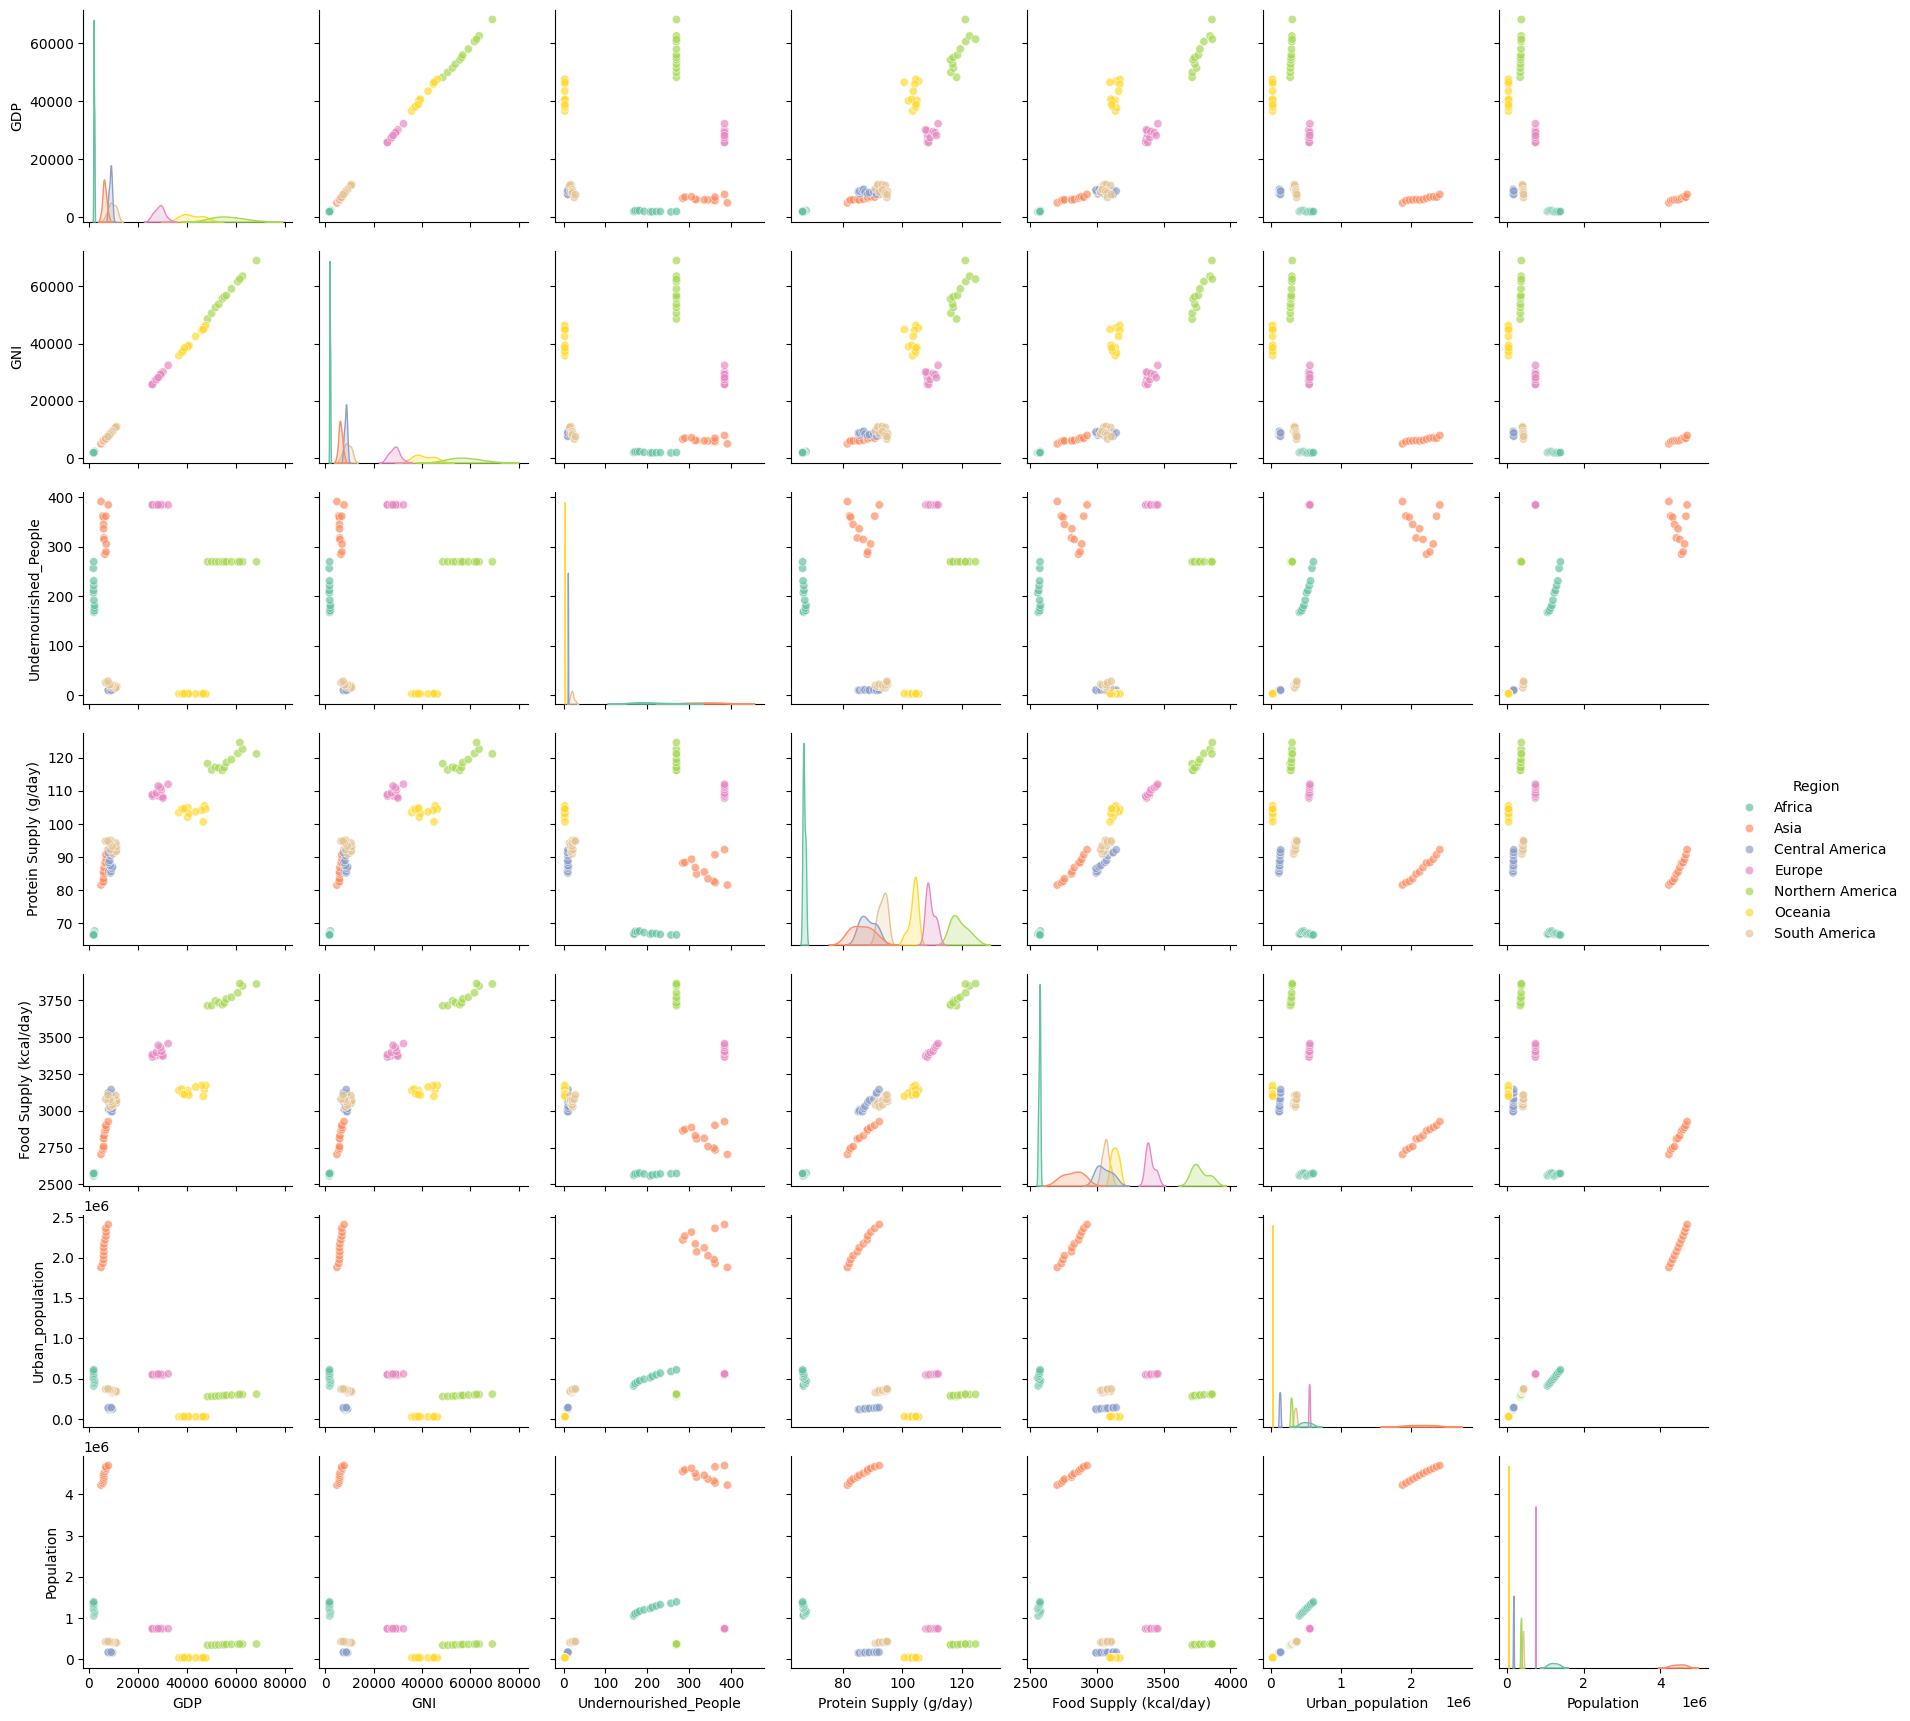

In [124]:
# Save the pairplot as an image file
sns.pairplot(
    collected_data,
    vars=[
        "GDP",
        "GNI",
        "Undernourished_People",
        "Protein Supply (g/day)",
        "Food Supply (kcal/day)",
        "Urban_population",
        "Population"
    ],
    hue="Region",
    palette="Set2",
    diag_kind="kde",  # Kernel Density Estimate on diagonal
    plot_kws={'alpha': 0.7}  # Transparency for better visualization
).savefig('pairplot_numerical_analysis.png')

print("Pairplot saved as 'pairplot_numerical_analysis.png'.")


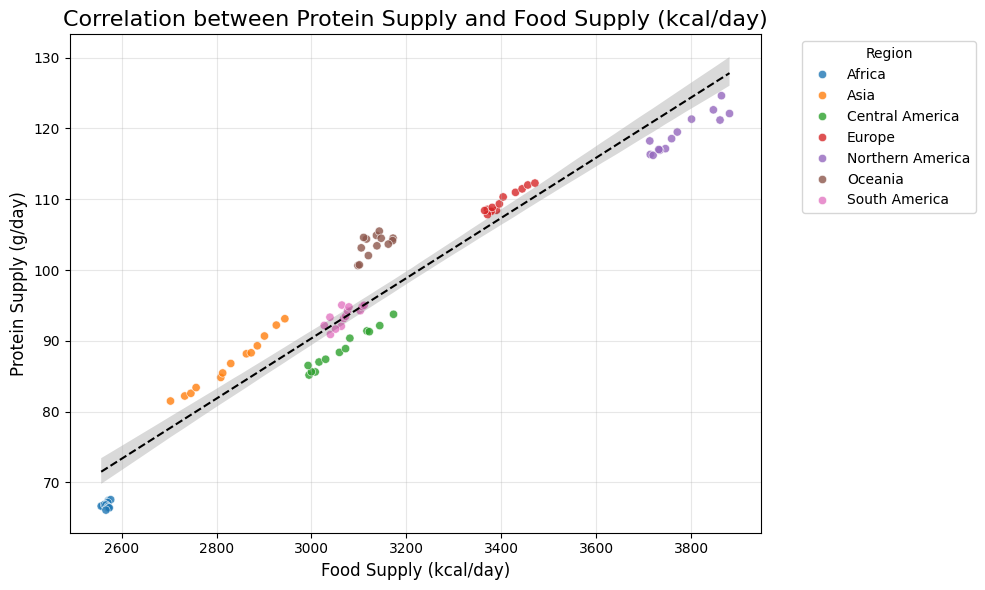

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation between Food Supply (kcal/day) and Protein Supply (g/day)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=processed_proteins['Food Supply (kcal/day)'],
    y=processed_proteins['Protein Supply (g/day)'],
    hue=processed_proteins['Region'],
    palette='tab10',
    alpha=0.8
)
sns.regplot(
    x=processed_proteins['Food Supply (kcal/day)'],
    y=processed_proteins['Protein Supply (g/day)'],
    scatter=False,
    color='black',
    line_kws={"linestyle": "dashed", "linewidth": 1.5}
)
plt.title('Correlation between Protein Supply and Food Supply (kcal/day)', fontsize=16)
plt.xlabel('Food Supply (kcal/day)', fontsize=12)
plt.ylabel('Protein Supply (g/day)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [46]:
correlation = processed_proteins[['Food Supply (kcal/day)', 'Protein Supply (g/day)']].corr()
print(correlation)


                        Food Supply (kcal/day)  Protein Supply (g/day)
Food Supply (kcal/day)                1.000000                0.959988
Protein Supply (g/day)                0.959988                1.000000


In [47]:
regional_corr = processed_proteins.groupby('Region')[
    ['Food Supply (kcal/day)', 'Protein Supply (g/day)']
].corr().unstack().iloc[:, 1]
print(regional_corr)


Region
Africa              0.367728
Asia                0.989536
Central America     0.985806
Europe              0.973966
Northern America    0.922145
Oceania             0.593278
South America       0.739709
Name: (Food Supply (kcal/day), Protein Supply (g/day)), dtype: float64


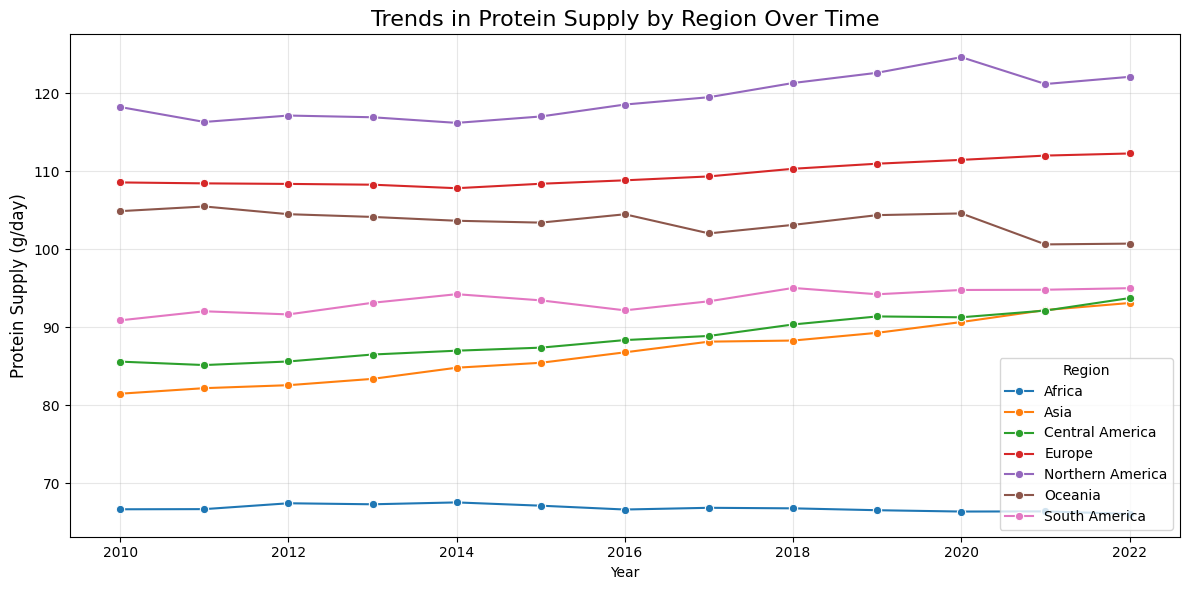

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=processed_proteins, x='Year', y='Protein Supply (g/day)', hue='Region', marker='o')
plt.title('Trends in Protein Supply by Region Over Time', fontsize=16)
plt.ylabel('Protein Supply (g/day)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 4. Global Trends in Protein Intake
  - Yearly trends in global protein supply.
  - Comparison of protein intake with total food supply.
  - Key periods of change and their drivers

---



# 5.  Regional Comparisons


*  Protein supply trends by country
*  Protein supply trends by region
*  Protein supply trends by low-income economies and high-income econimies
* Identifying regions with the highest/lowest protein supply
* Analysis of disparities in protein intake and total food supply

---








# 6. Correlation Analysis



*   Correlation between protein supply and total food supply
*   Relationships with GDP
  - Does higher GDP correlate with better protein supply?
  - Impact of HDI on protein intake

---



1.   List item
2.   List item





#7. Predictive Insights


*   Performance of predictive models
*   Feature importance: Key predictors for protein intake trends



# Conclusion and Recommendations



> Add blockquote



---





